In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [32]:
sns.set_style('darkgrid')

In [33]:
df= pd.read_csv('players_20.csv')

In [34]:
pd.set_option("display.max_columns", None)
df.sample(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12101,232602,https://sofifa.com/player/232602/jungya-kim/20...,Kim Jungya,김정야 金贞亚,31,1988-05-17,183,74,Korea Republic,Vegalta Sendai,64,64,325000,1000,CB,Right,1,3,2,Medium/Medium,Normal,No,406000.0,NaN,SUB,39.0,NaN,2018-01-06,2022.0,NaN,NaN,38.0,39.0,41.0,44.0,63.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,47,64,60,31,32,32,31,34,61,36,40,39,55,51,37,72,64,79,31,53,59,30,32,30,47,60,68,65,11,14,14,15,7,47+2,47+2,47+2,42+2,43+2,43+2,43+2,42+2,43+2,43+2,43+2,43+2,48+2,48+2,48+2,43+2,54+2,57+2,57+2,57+2,54+2,56+2,63+2,63+2,63+2,56+2
12926,180903,https://sofifa.com/player/180903/jay-oshea/20/...,J. O'Shea,James O'Shea,30,1988-08-10,183,70,Republic of Ireland,Brisbane Roar,63,63,350000,1000,"CM, CAM",Right,1,4,3,Medium/Low,Lean,No,438000.0,NaN,CAM,26.0,NaN,2019-07-24,2020.0,NaN,NaN,63.0,65.0,65.0,67.0,42.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,Finesse Shot,63,65,30,63,67,66,68,68,61,64,60,65,83,55,82,61,71,76,59,66,59,49,65,70,73,78,53,36,21,6,4,14,4,7,59+2,59+2,59+2,64+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,62+2,62+2,62+2,64+2,54+2,54+2,54+2,54+2,54+2,50+2,46+2,46+2,46+2,50+2
4645,205983,https://sofifa.com/player/205983/damjan-dokovi...,D. Đoković,Damjan Đoković,29,1990-04-18,190,86,Croatia,CFR Cluj,71,71,2300000,9000,"CM, CDM",Left,1,3,2,Medium/Medium,Normal,No,3200000.0,#Strength,CDM,8.0,NaN,2017-09-04,2022.0,NaN,NaN,65.0,60.0,70.0,69.0,64.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,55,62,74,54,68,75,60,73,74,61,68,72,71,49,70,66,75,90,59,71,66,66,65,64,74,58,70,64,14,10,8,10,6,66+2,66+2,66+2,67+2,67+2,67+2,67+2,67+2,68+2,68+2,68+2,68+2,70+2,70+2,70+2,68+2,68+2,70+2,70+2,70+2,68+2,67+2,68+2,68+2,68+2,67+2
6043,209698,https://sofifa.com/player/209698/birama-toure/...,B. Touré,Birama Touré,27,1992-06-06,183,77,Mali,AJ Auxerre,69,72,1200000,4000,"CDM, CM",Right,1,3,2,Low/High,Lean,No,2100000.0,NaN,RCM,12.0,NaN,2017-07-17,2020.0,NaN,NaN,43.0,52.0,63.0,64.0,68.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,42,62,66,35,61,55,46,65,72,55,34,58,67,61,66,70,74,72,66,69,68,40,64,56,65,69,69,67,12,11,9,6,9,55+2,55+2,55+2,57+2,57+2,57+2,57+2,57+2,60+2,60+2,60+2,59+2,64+2,64+2,64+2,59+2,65+2,68+2,68+2,68+2,65+2,64+2,67+2,67+2,67+2,64+2
8401,171721,https://sofifa.com/player/171721/romano-pertic...,R. Perticone,Romano Perticone,32,1986-08-13,184,76,Italy,US Salernitana 1919,67,67,500000,2000,"CB, LB",Right,1,3,2,Medium/High,Normal,No,800000.0,NaN,CB,29.0,NaN,2018-07-25,2020.0,NaN,NaN,49.0,42.0,52.0,48.0,64.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,34,68,66,34,32,52,44,55,62,50,48,71,66,67,52,79,79,75,59,68,63,23,26,35,60,63,64,67,9,7,11,6,7,48+2,48+2,48+2,47+2,45+2,45+2,45+2,47+2,47+2,47+2,47+2,48+2,53+2,53+2,53+2,48+2,61+2,63+2,63+2,63+2,61+2,62+2,66+2,66+2,66+2,62+2
15550,252007,https://sofifa.com/player/252007/jose-rivaldo-...,J. Loz

In [35]:
df.shape

(18278, 104)

In [36]:
# filtering out early on columns which would be irrelevant for this project
irrelvant_cols=['sofifa_id', 'player_url', 'long_name', 'dob', 'real_face', 'body_type', 'player_tags','loaned_from', 'joined',
                'team_jersey_number', 'nation_jersey_number', 'contract_valid_until', 'player_traits']

In [37]:
fifa= df.drop(irrelvant_cols, axis=1)

In [38]:
fifa.shape

(18278, 91)

### Checking duplicates

In [39]:
fifa.duplicated().sum()

0

There are no duplicated records in the dataset

### Columns as per datatypes

In [40]:
integer_columns = fifa.select_dtypes(include=['int64']).columns
float_columns = fifa.select_dtypes(include=['float64']).columns
object_columns = fifa.select_dtypes(include=['object']).columns

In [41]:
print(' int64 columns:\n',integer_columns)
print('=========================================================================================================')
print(' float64 columns:\n',float_columns)
print('=========================================================================================================')
print(' object columns:\n',object_columns)

 int64 columns:
 Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning'

## Dealing with Missing Values

In [42]:
gk_attribute_cols= ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [43]:
fifa[gk_attribute_cols]=fifa[gk_attribute_cols].fillna(0)

In [44]:
fifa.sample(10)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
15198,Park Won Jae,25,175,70,Korea Republic,Seongnam FC,60,62,220000,1000,RB,Right,1,2,2,High/Medium,NaN,SUB,NaN,69.0,35.0,45.0,58.0,57.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,59,25,43,39,26,54,43,52,42,59,70,68,65,57,76,52,71,66,62,35,54,57,59,42,38,50,60,59,60,7,6,13,9,9,48+2,48+2,48+2,52+2,50+2,50+2,50+2,52+2,49+2,49+2,49+2,53+2,49+2,49+2,49+2,53+2,58+2,53+2,53+2,53+2,58+2,58+2,56+2,56+2,56+2,58+2
17423,J. Pedersen,18,180,64,Denmark,Aalborg BK,54,70,140000,1000,CM,Right,1,3,2,High/Medium,263000.0,SUB,NaN,69.0,41.0,55.0,53.0,40.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,43,38,42,60,38,49,54,60,61,52,70,68,65,48,70,48,52,66,54,41,43,35,48,51,40,54,39,44,42,9,11,9,6,13,48+2,48+2,48+2,51+2,50+2,50+2,50+2,51+2,52+2,52+2,52+2,53+2,52+2,52+2,52+2,53+2,49+2,49+2,49+2,49+2,49+2,48+2,44+2,44+2,44+2,48+2
5020,N. Ibáñez,24,178,76,Argentina,Atlético de San Luis,70,75,2400000,8000,ST,Right,1,3,2,Medium/Medium,4300000.0,RS,NaN,74.0,68.0,54.0,65.0,33.0,69.0,0.0,0.0,0.0,0.0,0.0,0.0,39,70,70,61,64,63,58,41,58,64,73,74,70,67,72,71,77,73,71,63,55,18,72,58,59,63,45,22,21,11,6,12,13,13,68+2,68+2,68+2,63+2,66+2,66+2,66+2,63+2,64+2,64+2,64+2,63+2,58+2,58+2,58+2,63+2,47+2,47+2,47+2,47+2,47+2,46+2,45+2,45+2,45+2,46+2
3632,T. Sušić,27,186,80,Bosnia Herzegovina,VVV-Venlo,72,73,3500000,7000,CM,Left,1,2,4,Medium/Medium,5300000.0,SUB,NaN,66.0,68.0,74.0,73.0,58.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,73,66,60,76,69,75,77,74,73,76,64,67,69,64,59,70,61,65,73,70,71,56,64,72,71,69,48,66,62,15,16,15,15,9,68+2,68+2,68+2,70+2,69+2,69+2,69+2,70+2,71+2,71+2,71+2,70+2,70+2,70+2,70+2,70+2,65+2,66+2,66+2,66+2,65+2,64+2,62+2,62+2,62+2,64+2
13663,L. Burge,26,180,70,England,Sunderland,62,65,270000,2000,GK,Left,1,3,1,Medium/Medium,493000.0,SUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0,59.0,51.0,69.0,41.0,58.0,12,14,19,33,11,18,19,14,21,32,42,41,47,49,68,38,56,35,53,14,25,11,5,28,31,40,18,16,19,67,59,51,58,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7840,C. Brannagan,23,180,71,England,Oxford United,67,76,1200000,4000,"CM, CDM",Right,1,3,2,High/Medium,2300000.0,LDM,NaN,63.0,62.0,69.0,64.0,61.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67,58,53,70,52,63,70,73,67,63,62,64,69,63,67,74,62,68,63,65,75,61,61,68,53,65,58,65,64,12,7,8,8,12,62+2,62+2,62+2,63+2,63+2,63+2,63+2,63+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,64+2,65+2,65+2,65+2,64+2,63+2,62+2,62+2,62+2,63+2
3592,M. Hector,26,193,82,Jamaica,Chelsea,72,74,3300000,53000,CB,Right,1,3,2,Medium/Medium,6600000.0,RES,NaN,64.0,47.0,51.0,59.0,71.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,35,40,73,62,31,60,32,30,58,59,57,69,54,65,43,68,67,66,80,44,79,68,49,52,54,61,67,75,70,13,12,11,12,13,57+2,57+2,57+2,54+2,56+2,56+2,56+2,54+2,56+2,56+2,56+2,55+2,59+2,59+2,59+2,55+2,62+2,66+2,66+2,66+2,62+2,64+2,70+2,70+2,70+2,64+2
12661,C. Maghoma,21,195,90,DR Congo,Arka Gdynia,63,68,450000,1000,CB,Right,1,3,2,Low/Medium,641000.0,SUB,NaN,50.0,32.0,41.0,36.0,62.0,75.0,0

In [45]:
fifa[fifa['team_position']=='GK']

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,NaN,NaN,NaN,NaN,NaN,NaN,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,Shen Jun,32,186,88,China PR,Shanghai Greenland Shenhua FC,56,56,50000,2000,GK,Right,1,1,1,Medium/Medium,78000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,48.0,56.0,62.0,44.0,56.0,11,14,15,26,16,11,20,17,21,16,40,47,30,52,48,42,55,32,72,12,19,23,14,16,24,22,23,17,13,57,48,56,56,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17341,M. McGinley,29,185,86,Republic of Ireland,Finn Harps,55,57,70000,1000,GK,Right,1,2,1,Medium/Medium,114000.0,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,55.0,52.0,57.0,41.0,55.0,13,15,11,15,12,12,19,15,13,24,40,42,54,47,49,39,50,31,61,14,34,11,13,10,13,47,12,19,18,55,55,52,55,57,NaN,N

In [46]:
no_goalkeeper=['pace','shooting','passing','dribbling','defending','physic',
        'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm',
        'rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

for index in fifa.index:
    if 'GK' in fifa.loc[index, 'player_positions']:
        for col in no_goalkeeper:
            if np.isnan(fifa.loc[index, col]):
                fifa.loc[index, col]=0

In [47]:
fifa[fifa['team_position']=='GK'].head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,250000,GK,Right,3,4,1,Medium/Medium,143400000.0,GK,SUB,0.0,0.0,0.0,0.0,0.0,0.0,88.0,85.0,88.0,90.0,45.0,88.0,18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,Alisson,26,191,91,Brazil,Liverpool,89,91,58000000,155000,GK,Right,3,3,1,Medium/Medium,111700000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,85.0,84.0,85.0,89.0,51.0,90.0,17,13,19,45,20,27,19,18,44,30,56,47,40,88,37,64,52,32,78,14,27,11,13,66,23,65,15,19,16,85,84,85,90,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,De Gea,28,192,82,Spain,Manchester United,89,90,56000000,205000,GK,Right,4,3,1,Medium/Medium,110600000.0,GK,GK,0.0,0.0,0.0,0.0,0.0,0.0,90.0,84.0,81.0,92.0,58.0,85.0,17,13,21,50,13,18,21,19,47,38,57,58,63,87,43,61,67,43,60,12,38,30,12,65,29,68,25,21,13,90,84,81,85,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,Ederson,25,188,86,Brazil,Manchester City,88,91,54500000,185000,GK,Left,2,3,1,Medium/Medium,104900000.0,GK,NaN,0.0,0.0,0.0,0.0,0.0,0.0,86.0,82.0,93.0,88.0,63.0,86.0,20,14,14,56,18,23,15,20,58,40,64,63,60,87,48,70,66,41,68,18,38,27,20,70,17,70,29,15,8,86,82,93,86,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
fifa.sample(15)

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,team_position,nation_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
17543,B. Syla,21,169,66,Austria,Wolfsberger AC,54,63,110000,2000,CAM,Right,1,3,2,Medium/Low,182000.0,RES,NaN,63.0,45.0,50.0,58.0,36.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,38,43,49,55,39,54,58,46,53,53,65,61,88,54,79,53,74,30,40,41,55,42,50,48,39,51,30,34,31,11,9,7,9,14,50+2,50+2,50+2,52+2,51+2,51+2,51+2,52+2,53+2,53+2,53+2,50+2,49+2,49+2,49+2,50+2,43+2,44+2,44+2,44+2,43+2,42+2,42+2,42+2,42+2,42+2
4490,A. Gerndt,32,185,80,Sweden,FC Lugano,71,71,1900000,7000,"ST, CAM",Left,1,4,3,Medium/Medium,2700000.0,RS,NaN,76.0,72.0,70.0,71.0,33.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,69,70,54,72,70,71,69,70,64,72,80,73,76,70,61,74,66,77,71,74,60,30,74,70,66,68,27,35,32,13,10,8,13,11,70+2,70+2,70+2,72+2,71+2,71+2,71+2,72+2,71+2,71+2,71+2,71+2,66+2,66+2,66+2,71+2,56+2,54+2,54+2,54+2,56+2,53+2,46+2,46+2,46+2,53+2
5922,A. Barberis,25,177,72,Italy,Crotone,69,74,1400000,2000,"CM, CDM",Right,1,2,2,High/High,2200000.0,RCM,NaN,67.0,46.0,67.0,65.0,59.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67,32,38,71,46,59,47,65,68,71,68,67,69,70,71,61,68,81,56,57,78,75,70,65,51,61,48,66,58,6,14,10,6,14,56+2,56+2,56+2,63+2,62+2,62+2,62+2,63+2,64+2,64+2,64+2,65+2,68+2,68+2,68+2,65+2,67+2,67+2,67+2,67+2,67+2,65+2,61+2,61+2,61+2,65+2
5993,K. Hazard,23,171,70,Belgium,KSV Cercle Brugge,69,73,1400000,7000,"RW, LW",Right,1,4,3,Medium/Medium,2100000.0,LW,NaN,76.0,60.0,67.0,74.0,28.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,68,56,39,69,60,74,64,60,66,72,81,71,80,63,79,61,66,50,60,66,53,28,66,67,56,71,17,34,32,12,15,7,6,9,62+2,62+2,62+2,69+2,67+2,67+2,67+2,69+2,68+2,68+2,68+2,68+2,63+2,63+2,63+2,68+2,52+2,49+2,49+2,49+2,52+2,48+2,41+2,41+2,41+2,48+2
6914,D. Oyarzún,26,185,78,Chile,Coquimbo Unido,68,73,1100000,2000,"CB, LB",Left,1,3,2,Medium/Medium,1500000.0,LCB,NaN,62.0,46.0,54.0,55.0,68.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,56,44,72,64,36,55,55,27,61,58,58,65,55,49,44,66,72,77,73,33,68,67,48,38,34,48,67,72,57,10,8,12,8,7,55+2,55+2,55+2,53+2,52+2,52+2,52+2,53+2,52+2,52+2,52+2,55+2,56+2,56+2,56+2,55+2,62+2,63+2,63+2,63+2,62+2,63+2,66+2,66+2,66+2,63+2
2089,J. Furch,29,187,88,Argentina,Santos Laguna,75,75,6500000,23000,ST,Right,1,3,3,Medium/Low,11100000.0,LS,NaN,56.0,75.0,61.0,66.0,39.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,51,77,80,69,66,65,60,48,57,72,48,63,54,74,51,78,75,78,87,69,60,46,79,63,64,76,39,25,27,11,9,13,8,13,73+2,73+2,73+2,66+2,70+2,70+2,70+2,66+2,67+2,67+2,67+2,66+2,65+2,65+2,65+2,66+2,54+2,55+2,55+2,55+2,54+2,51+2,52+2,52+2,52+2,51+2
17409,J. Sparkes,18,175,63,England,Exeter City,54,70,140000,1000,"LM, RM",Left,1,3,3,Medium/Medium,333000.0,RES,NaN,74.0,44.0,47.0,56.0,38.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,50,39,40,47,37,53,45,45,42,52,75,73,75,50,78,51,65,63,45,47,46,38,48,49,49,43,36,40,36,6,9,7,7,13,48+2,48+2,48+2,52+2,51+2,51+2,51+2,52+2,51+2,51+2,51+2,52+2,48+2,48+2,48+2,52+2,48+2,44+2,44+2,44+2,48+2,47+2,42+2,42+2,42+2,47+2
11880,N. Feldhahn,32,190,85,Germany,Bayern München II,64,64,290000,2000,"CB, CDM, CM",Right,1,2,2,Medium/Medium,4210

In [49]:
import missingno as msno

<AxesSubplot:>

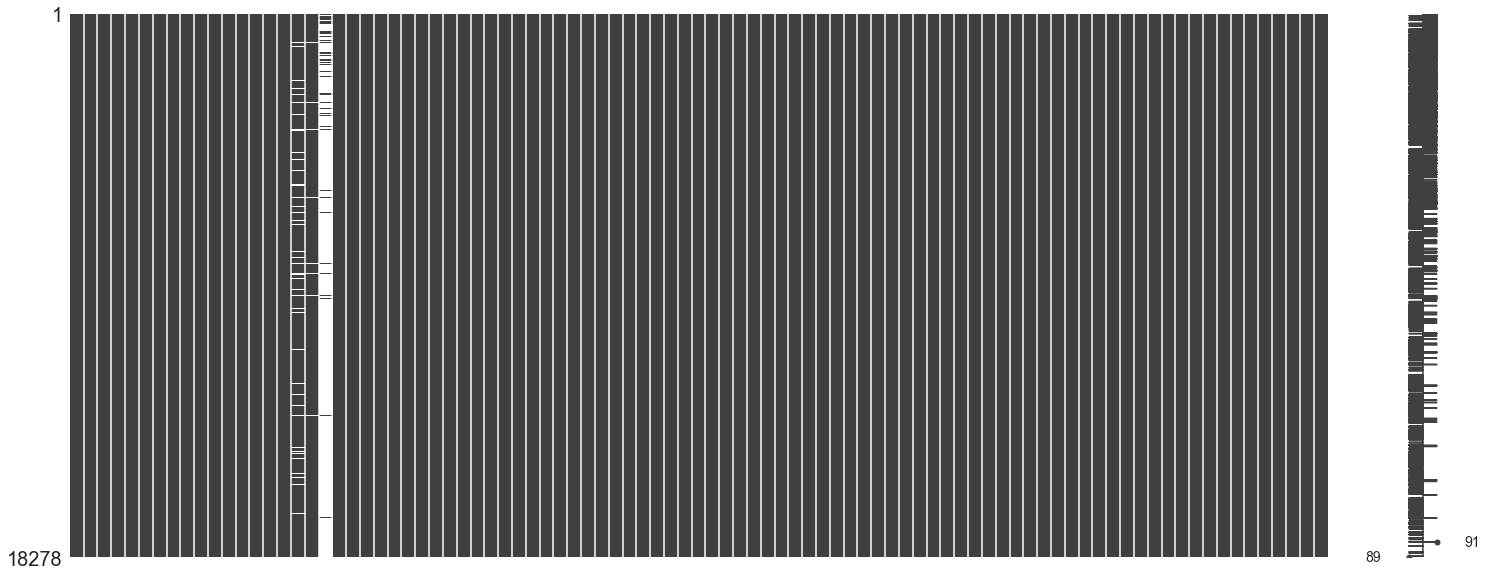

In [50]:
msno.matrix(fifa)

In [51]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]*100

nation_position       93.839589
release_clause_eur     7.101433
team_position          1.313054
short_name             0.000000
goalkeeping_diving     0.000000
                        ...    
gk_positioning         0.000000
gk_speed               0.000000
gk_reflexes            0.000000
gk_kicking             0.000000
rb                     0.000000
Length: 91, dtype: float64

In [52]:
# deleting column 'nation_position'

fifa.drop('nation_position', axis=1, inplace=True)

We will replace missing values in team_position column by 'Not Given'

In [53]:
fifa['team_position']=fifa['team_position'].fillna('Not Given')

In [54]:
fifa.isna().sum().sort_values(ascending=False)/fifa.shape[0]

release_clause_eur          0.071014
short_name                  0.000000
defending_sliding_tackle    0.000000
rs                          0.000000
st                          0.000000
                              ...   
gk_positioning              0.000000
gk_speed                    0.000000
gk_reflexes                 0.000000
gk_kicking                  0.000000
rb                          0.000000
Length: 90, dtype: float64

Now only one column is remained with the missing value. We do not want to directly drop the row as we could loose data on some important players. So let us wait for the EDA part and impute the missing value

# Exploratory Data Analysis

## Univariate Analysis

### Height, Weight and Age Distribution

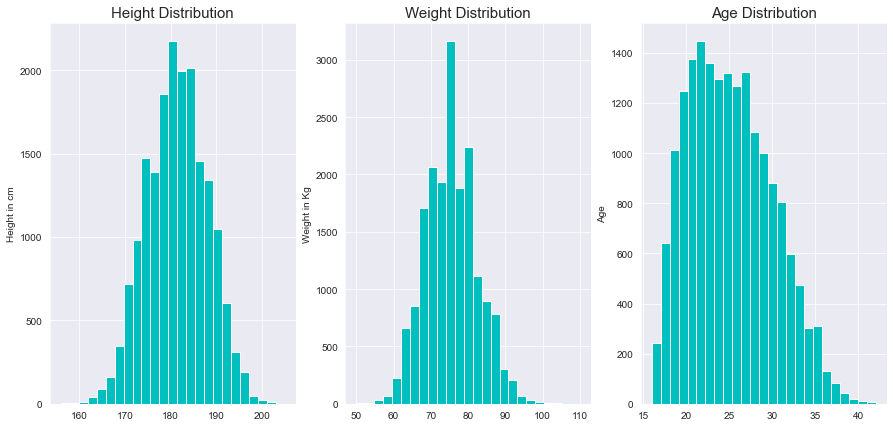

In [55]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.hist(fifa['height_cm'], bins=25, color='c')
plt.ylabel('Height in cm')
plt.title('Height Distribution'.title(), fontsize=15)

plt.subplot(1,3,2)
plt.hist(fifa['weight_kg'], bins=25, color='c')
plt.ylabel('Weight in Kg')
plt.title('Weight Distribution'.title(), fontsize=15)

plt.subplot(1,3,3)
plt.hist(fifa['age'], bins=25, color='c')
plt.ylabel('Age')
plt.title('Age Distribution'.title(), fontsize=15);

- Both attributes appear to follow normal distribution
- Heights of most of the players gathered around 175 cm to 185 cm. Highest peak is seen at 180 cm.
- Most players in the fifa dataset weighed around 70 kg to 85kg. Most number of players has weight of 75 kg.
- Age distribution appeared to be slightly right skewed. Players' age is spread a bit more on the right side than the left one. Most number of players fell into age between 18 to 30 years.

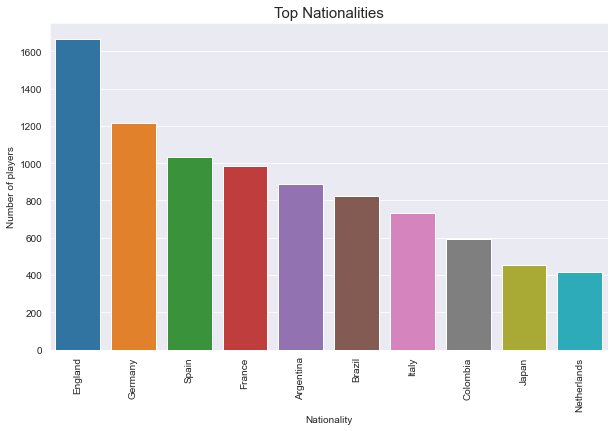

In [56]:
top_nationalities=fifa.nationality.value_counts(ascending=False)[:10]

plt.figure(figsize=(10,6))
sns.barplot(top_nationalities.keys(), top_nationalities)
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.xticks(rotation=90)
plt.title('Top nationalities'.title(), fontsize=15);

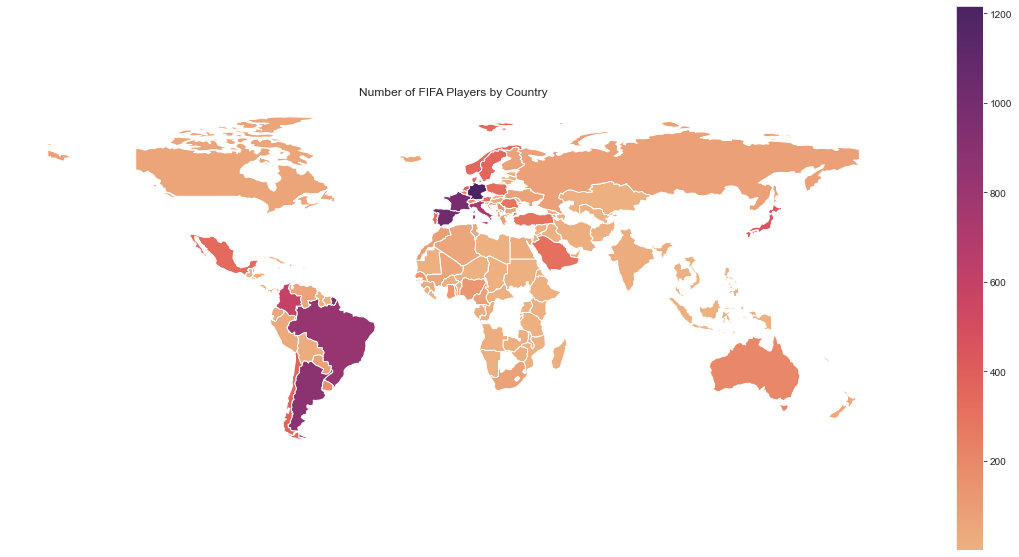

In [57]:
import geopandas as gpd

nationality_counts = fifa.groupby('nationality').size().reset_index(name='count')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(nationality_counts, left_on='name', right_on='nationality')

# plot the choropleth map
fig, ax = plt.subplots(figsize=(20, 10))
merged.plot(column='count', cmap='flare', ax=ax, legend=True)
ax.set_title('Number of FIFA Players by Country')
ax.set_axis_off()
plt.show()


- England has the highest percentage of players in the dataset at 9.12%.
- The top 10 nationalities together account for more than 45% of the players in the dataset, indicating a concentration of players from a relatively small number of countries.
- European countries dominate the top 10, with six of them being from Europe.
- South American countries are also well represented in the top 10, with Argentina and Brazil being in the top 5.
- Japan is the only Asian country in the top 10, indicating a relatively smaller presence of players from Asia in the dataset.
- The differences in percentages between the top 10 countries are relatively small, with the highest percentage (England) being only about 6 percentage points higher than the 10th highest percentage (Netherlands). This suggests a relatively even distribution of players across the top 10 countries in the dataset.

### Value, Wage and Release Clause of Players

<AxesSubplot:ylabel='release_clause_eur'>

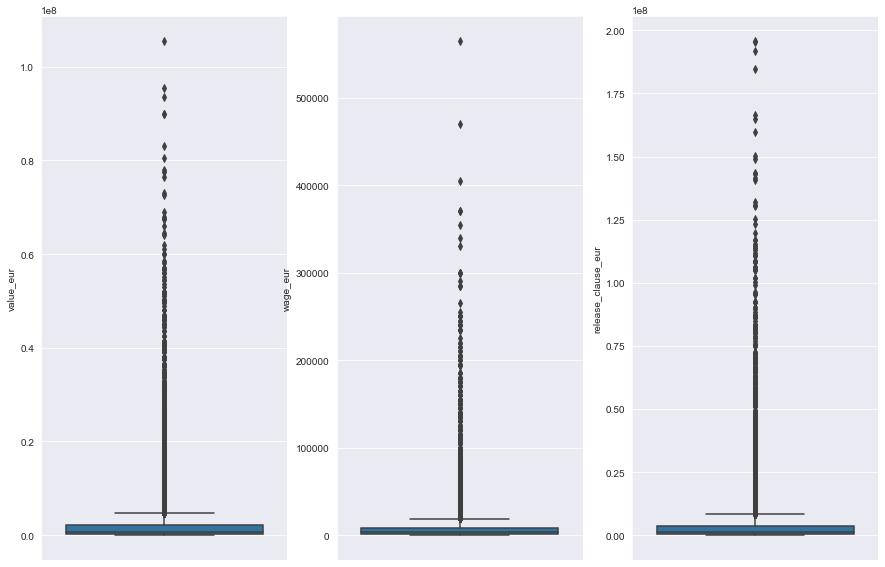

In [58]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y='value_eur',data=fifa)

plt.subplot(1,3,2)
sns.boxplot(y='wage_eur',data=fifa)

plt.subplot(1,3,3)
sns.boxplot(y='release_clause_eur',data=fifa)

- There are players who have zero market value, wage, and/or release clause.
- The distributions of all three attributes are positively skewed, with a long tail towards the higher values.
- The maximum values for all three attributes are significantly higher than their respective third quartiles, indicating the presence of outliers with extremely high values.
- The median wage is much lower than the median market value and median release clause, indicating that players receive a relatively small portion of their market value as wage.

### Preferred Foot

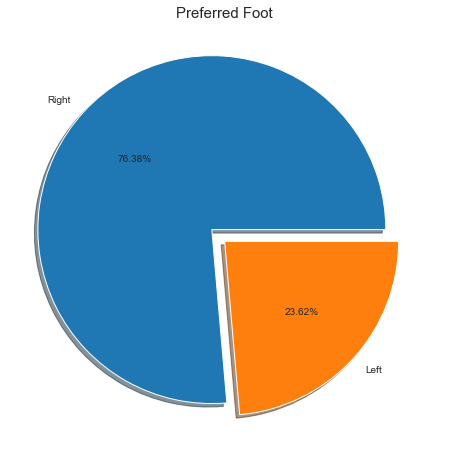

In [59]:
foot=fifa.preferred_foot.value_counts()
plt.figure(figsize=(8,8))
plt.pie(foot, labels=foot.keys(), autopct='%.2f%%', explode=[0.1,0], shadow=True)
plt.title('Preferred foot'.title(), fontsize=15);

- The majority of players in the FIFA dataset have a preferred foot of Right, with a count of 13960.
- The number of players with a preferred foot of Left is much smaller, with a count of only 4318 which is equivalent to 23.62% of the total players.
- This suggests that the majority of football players are more comfortable playing with their right foot, which could be due to a variety of factors such as being naturally right-footed or receiving more training and practice on their right side.

### Overall and Potential Attributes

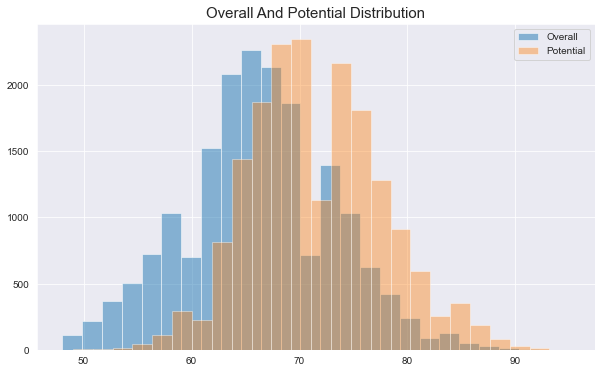

In [62]:
plt.figure(figsize=(10,6))
plt.hist(fifa['overall'], bins=25, alpha=0.5, label='Overall')
plt.hist(fifa['potential'], bins=25, alpha=0.4, label='Potential')
plt.legend()
plt.title('Overall and Potential Distribution'.title(), fontsize=15);

- Potential attribute is distributed on the right side as compared to Overall attributes. This suggests that many plates are players are yet to level thier potential.
- Overall attribute is gathered more between 60 to 70, whereas, most of the players have potential to be between 65 to 75.

## Bivariate Analysis

### Heights vs Weights

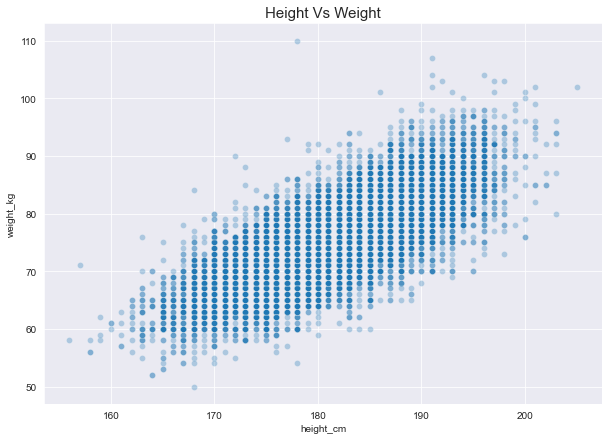

In [88]:
plt.figure(figsize=(10,7))
sns.scatterplot('height_cm', 'weight_kg', data=fifa, alpha=0.3)
plt.title('Height vs Weight'.title(), fontsize=15);

Players weights are positively correlated with their heights. In other words, players with more heights tend to have more weights.

### Age vs other attributes

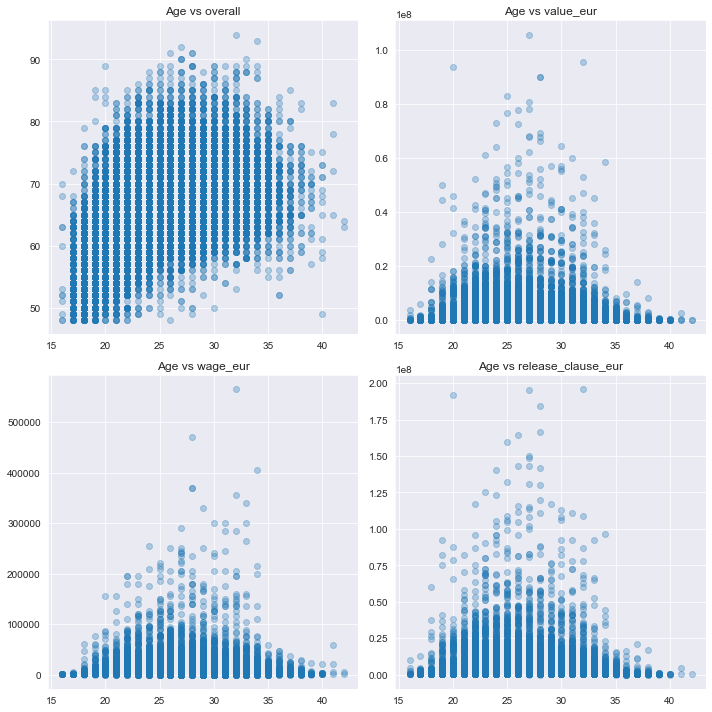

In [87]:
# columns to compare with Age

columns=['overall', 'value_eur', 'wage_eur', 'release_clause_eur']

fig, ax=plt.subplots(2,2, figsize=(10,10))

for col, ax in zip(columns, ax.flatten()):
    ax.scatter(fifa['age'], fifa[col], alpha=0.3)
    ax.set_title('Age vs {}'.format(col))
plt.tight_layout()

- For Age vs Overall, the general trend is upward. It insuinitate that players who spent more years playing on the pitch gained more potential rating. However, the trend is moderate. Some players show higher overall ratings than many players despite being younger and vice-versa is true for some players as well. Surely, natural talent plays a role in players' development. Looking at Haaland and Mbappe, we need not ask for proof.
- When attribute 'age' is plotted against players values, wage and release clause, we have observed similar trend in all the plots. Value, wage and Release clause is higher for player who fall in age group between 21 years and 34 years. 

### Release clause vs Value and Wage

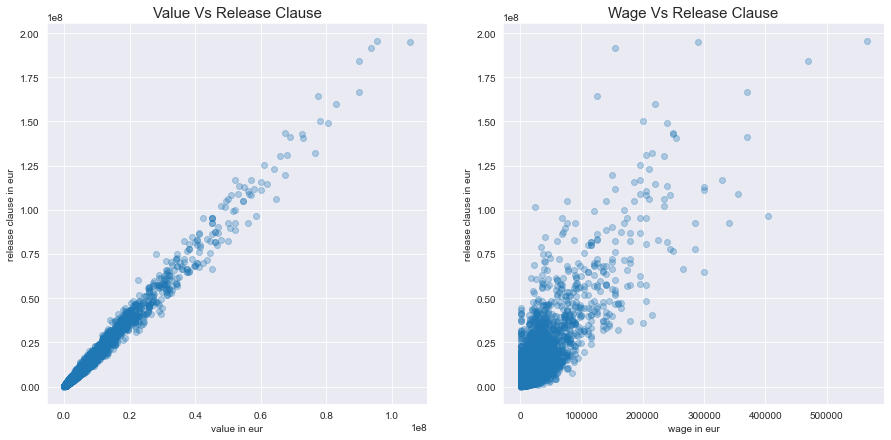

In [89]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(fifa['value_eur'], fifa['release_clause_eur'], alpha=0.3)
plt.xlabel('value in eur')
plt.ylabel('release clause in eur')
plt.title('value vs release clause'.title(), fontsize=15)

plt.subplot(1,2,2)
plt.scatter(fifa['wage_eur'], fifa['release_clause_eur'], alpha=0.3)
plt.xlabel('wage in eur')
plt.ylabel('release clause in eur')
plt.title('wage vs release clause'.title(), fontsize=15);

- Players value is strongly correlated with his release clause. Player with higher value tend to have higher release clause intcluded in his contract.
- Wage also shows postive corrleation with release clause. However, it is not as strong as the one between value and release clause.
- As we go on increase value, age or release clause, the number of players falling into higher groups decreases and scatter plot appears dispersed.